Import libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read in the file.

In [2]:
data = pd.read_csv("./sales_data_sample.csv", encoding='unicode_escape')

## Exploratory analysis

Check how many rows and columns there are.

In [3]:
data.shape

(2823, 25)

Check where the null values are.

In [4]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Check data types.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ORDERNUMBER         2823 non-null int64
QUANTITYORDERED     2823 non-null int64
PRICEEACH           2823 non-null float64
ORDERLINENUMBER     2823 non-null int64
SALES               2823 non-null float64
ORDERDATE           2823 non-null object
STATUS              2823 non-null object
QTR_ID              2823 non-null int64
MONTH_ID            2823 non-null int64
YEAR_ID             2823 non-null int64
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null int64
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
PHONE               2823 non-null object
ADDRESSLINE1        2823 non-null object
ADDRESSLINE2        302 non-null object
CITY                2823 non-null object
STATE               1337 non-null object
POSTALCODE          2747 non-null object
COUNTRY             2823 non-null object
TERRITORY           1749 non-null obje

Render all the columns.

In [6]:
pd.set_option('display.max_columns', data.shape[1])

In [7]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


Drop columns that won't be useful for the analysis.

In [8]:
data.drop(["PHONE", "ADDRESSLINE1", "ADDRESSLINE2", "CITY", "STATE", "POSTALCODE", "TERRITORY", "CONTACTLASTNAME", "CONTACTFIRSTNAME"], axis = 1, inplace = True)

Truncate the product code to the first three digits.

In [9]:
data['PRODUCTINITIAL'] = data['PRODUCTCODE'].str[:3]

Drop the original product code column.

In [10]:
data.drop(['PRODUCTCODE'], axis = 1, inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
ORDERNUMBER        2823 non-null int64
QUANTITYORDERED    2823 non-null int64
PRICEEACH          2823 non-null float64
ORDERLINENUMBER    2823 non-null int64
SALES              2823 non-null float64
ORDERDATE          2823 non-null object
STATUS             2823 non-null object
QTR_ID             2823 non-null int64
MONTH_ID           2823 non-null int64
YEAR_ID            2823 non-null int64
PRODUCTLINE        2823 non-null object
MSRP               2823 non-null int64
CUSTOMERNAME       2823 non-null object
COUNTRY            2823 non-null object
DEALSIZE           2823 non-null object
PRODUCTINITIAL     2823 non-null object
dtypes: float64(2), int64(7), object(7)
memory usage: 353.0+ KB


In [12]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,PRODUCTINITIAL
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,USA,Small,S10
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,France,Small,S10
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,France,Medium,S10
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium,S10
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium,S10


Preliminarily visualize data.

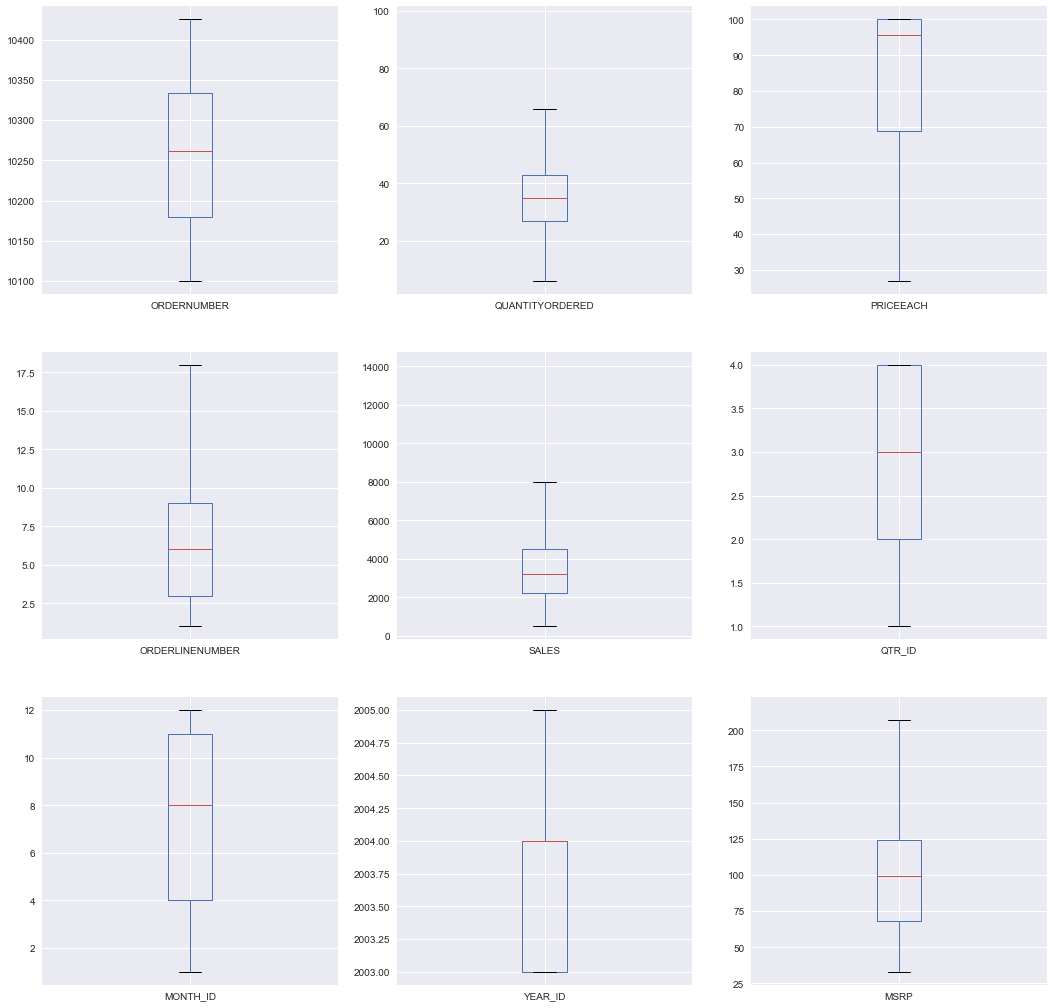

In [13]:
plt.rcParams['figure.figsize'] = [18, 18]
data.plot(kind = 'box', subplots = True, layout = (3, 3), sharex = False, sharey = False)
plt.show()

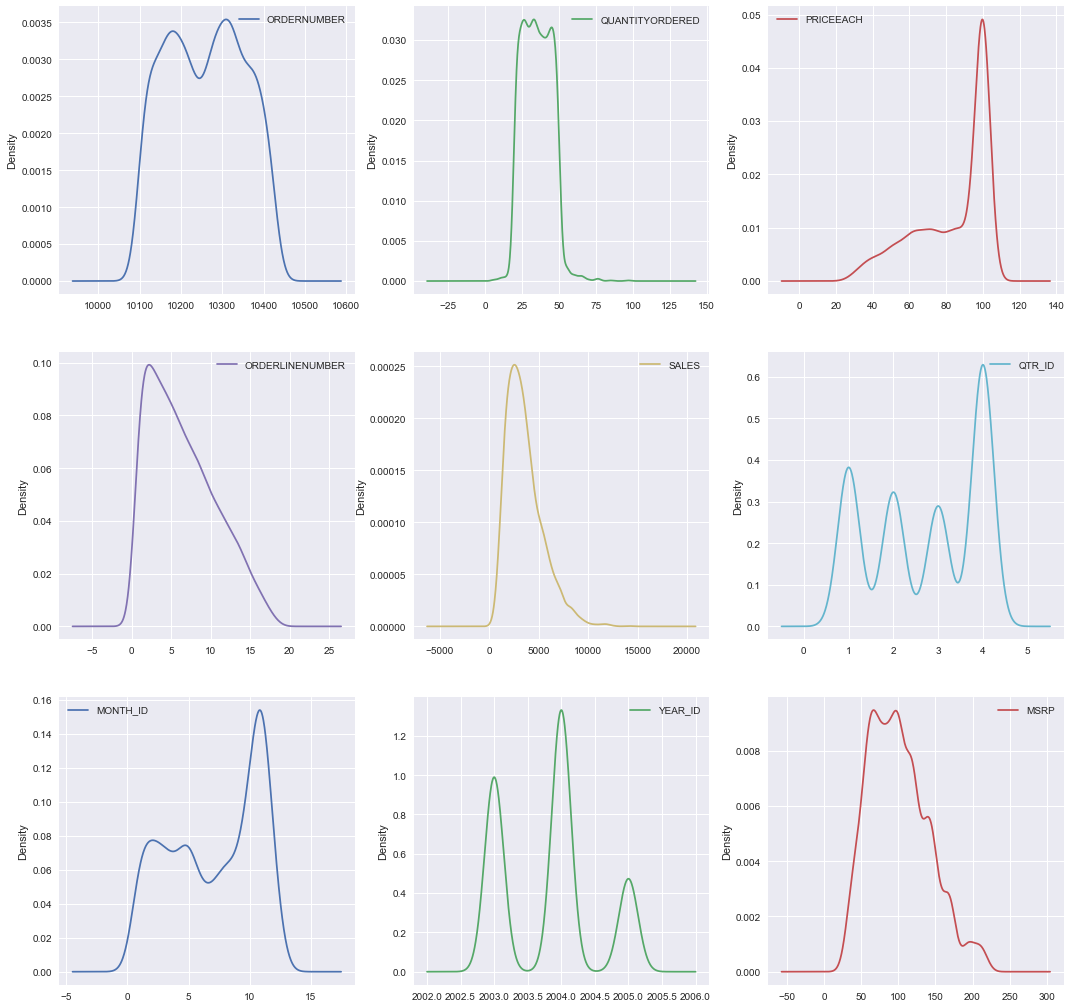

In [14]:
plt.rcParams['figure.figsize'] = [18, 18]
data.plot(kind = 'density', subplots = True, layout = (3, 3), sharex = False, sharey = False)
plt.show()

In [15]:
data['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

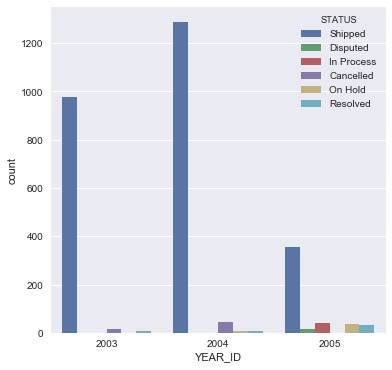

In [16]:
plt.rcParams['figure.figsize'] = (6, 6)
sns.countplot(x = 'YEAR_ID', hue = 'STATUS', data = data)

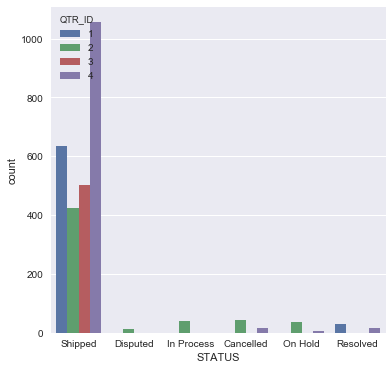

In [17]:
plt.rcParams['figure.figsize'] = (6, 6)
sns.countplot(x = 'STATUS', hue = 'QTR_ID', data = data)

In [18]:
data1 = data.groupby(['YEAR_ID', 'QTR_ID']).agg({'SALES': 'sum'})

In [19]:
data1

SALES
YEAR_ID QTR_ID            
2003    1        445094.69
        2        562365.22
        3        649514.54
        4       1860005.09
2004    1        833730.68
        2        766260.73
        3       1109396.27
        4       2014774.92
2005    1       1071992.36
        2        719494.35

In [20]:
data1.reset_index(inplace = True)

In [21]:
data1

,YEAR_ID,QTR_ID,SALES
0,2003,1,445094.69
1,2003,2,562365.22
2,2003,3,649514.54
3,2003,4,1860005.09
4,2004,1,833730.68
5,2004,2,766260.73
6,2004,3,1109396.27
7,2004,4,2014774.92
8,2005,1,1071992.36
9,2005,2,719494.35


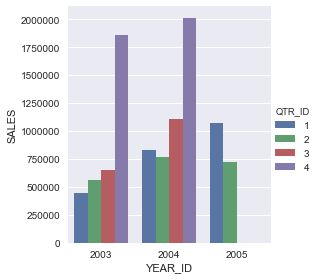

In [22]:
sns.factorplot(x = "YEAR_ID", y = "SALES", data = data1, hue = "QTR_ID", kind = "bar")

## RFM analysis

In [23]:
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

To analyze recency, frequency, monetary, we need to look at ORDERNUMBER, SALES, ORDERDATE, CUSTOMERNAME.

In [24]:
rfm_data = data[["CUSTOMERNAME", "ORDERDATE", "ORDERNUMBER", "SALES"]]

Convert ORDERDATE to date data type, getting rid of time.

In [26]:
rfm_data["ORDERDATE"] = pd.to_datetime(rfm_data["ORDERDATE"])

Check the most recent order date and make it the reference for Recency.

In [27]:
rfm_data["ORDERDATE"].max()

Timestamp('2005-05-31 00:00:00')

In [28]:
now = dt.datetime(2005, 5, 31)

Check the days between the most recent order date and now, the unique order numbers, the total sales of each customer name.

In [29]:
rfm = rfm_data.groupby("CUSTOMERNAME").agg({"ORDERDATE": lambda x: (now - x.max()).days, #Recency
                                            "ORDERNUMBER": lambda x: x.nunique(), #Frequency
                                            "SALES": lambda x: x.sum()}) #Monetary

In [30]:
rfm["ORDERDATE"] = rfm["ORDERDATE"].astype(int)

In [31]:
rfm.rename(columns = {"ORDERDATE": "Recency", "ORDERNUMBER": "Frequency", "SALES": "Monetary"}, inplace = True)

In [32]:
rfm.head()

,Recency,Frequency,Monetary
CUSTOMERNAME,,,
"AV Stores, Co.",195,3,157807.81
Alpha Cognac,64,3,70488.44
Amica Models & Co.,264,2,94117.26
"Anna's Decorations, Ltd",83,4,153996.13
Atelier graphique,187,3,24179.96


Construct quantiles.

In [33]:
quantiles = rfm.quantile(q = [0.25, 0.5, 0.75])

In [34]:
quantiles

,Recency,Frequency,Monetary
0.25,80.25,2.0,70129.4325
0.50,185.00,3.0,86522.6100
0.75,229.25,3.0,120575.8750


In [35]:
quantiles = quantiles.to_dict()

In [36]:
quantiles

{'Frequency': {0.25: 2.0, 0.5: 3.0, 0.75: 3.0},
 'Monetary': {0.25: 70129.432499999995,
  0.5: 86522.609999999986,
  0.75: 120575.87499999997},
 'Recency': {0.25: 80.25, 0.5: 185.0, 0.75: 229.25}}

Create quantile segmentation table.

In [37]:
rfm_segment = rfm.copy()

In [57]:
# x: value, p: Recency, d: quantile dictionary
# The lower recency value the better.
def r_class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [58]:
# x: value, p: Frequency/Monetary, d: quantile dictionary
# The higher frequency/monetary value the better.
def fm_class(x, p, d):
    if x > d[p][0.75]: # Since Frequency quantile 0.5 and 0.75 both return 3, I don't use "=" here so that 3s and 4s both exist, otherwise there won't be any 3s.
        return 4
    elif x >= d[p][0.5]:
        return 3
    elif x >= d[p][0.25]:
        return 2
    else:
        return 1

In [59]:
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(r_class, args = ('Recency', quantiles))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(fm_class, args = ('Frequency', quantiles))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(fm_class, args = ('Monetary', quantiles))

In [61]:
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CUSTOMERNAME,,,,,,
"AV Stores, Co.",195,3,157807.81,2,3,4
Alpha Cognac,64,3,70488.44,4,3,2
Amica Models & Co.,264,2,94117.26,1,2,3
"Anna's Decorations, Ltd",83,4,153996.13,3,4,4
Atelier graphique,187,3,24179.96,2,3,1


In [66]:
rfm_segment['RFM_Value'] = rfm_segment['R_Quartile'] * 100 + rfm_segment['F_Quartile'] * 10 + rfm_segment['M_Quartile']

In [68]:
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Value
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",195,3,157807.81,2,3,4,234
Alpha Cognac,64,3,70488.44,4,3,2,432
Amica Models & Co.,264,2,94117.26,1,2,3,123
"Anna's Decorations, Ltd",83,4,153996.13,3,4,4,344
Atelier graphique,187,3,24179.96,2,3,1,231


Voila! RFM values are cranked out, through which inferences could be made.

#### 1. Who are the best customers?

In [74]:
rfm_segment[rfm_segment['RFM_Value'] == 444].sort_values('Monetary', ascending = False).head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Value
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,4,4,4,444
Mini Gifts Distributors Ltd.,2,17,654858.06,4,4,4,444
La Rochelle Gifts,0,4,180124.90,4,4,4,444
The Sharp Gifts Warehouse,39,4,160010.27,4,4,4,444
Souveniers And Things Co.,2,4,151570.98,4,4,4,444


#### 2. Which customers are on the verge of churning?

In [78]:
rfm_segment[rfm_segment['R_Quartile'] <= 2].sort_values('Monetary', ascending = False).head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Value
CUSTOMERNAME,,,,,,,
Land of Toys Inc.,197,4,164069.44,2,4,4,244
"AV Stores, Co.",195,3,157807.81,2,3,4,234
"Saveley & Henriot, Co.",455,3,142874.25,1,3,4,134
Rovelli Gifts,200,3,137955.72,2,3,4,234
Online Diecast Creations Co.,208,3,131685.30,2,3,4,234


#### 3. Which are lost customers?

In [79]:
rfm_segment[rfm_segment['RFM_Value'] == 111].sort_values('Recency', ascending = False).head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Value
CUSTOMERNAME,,,,,,,
"Bavarian Collectables Imports, Co.",258,1,34993.92,1,1,1,111


#### 4. Which are loyal customers?

In [80]:
rfm_segment[rfm_segment['F_Quartile'] >= 3].sort_values('Monetary', ascending = False).head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Value
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,4,4,4,444
Mini Gifts Distributors Ltd.,2,17,654858.06,4,4,4,444
"Australian Collectors, Co.",183,5,200995.41,3,4,4,344
Muscle Machine Inc,181,4,197736.94,3,4,4,344
La Rochelle Gifts,0,4,180124.90,4,4,4,444
